<a href="https://colab.research.google.com/github/gdejesus/Laboratorio-NB-RL/blob/master/2-Lab01-Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt
import os.path

In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

--2019-10-15 12:41:29--  https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lab-ml-itba/Laboratorio-01/master/lab_helper.py [following]
--2019-10-15 12:41:29--  https://raw.githubusercontent.com/lab-ml-itba/Laboratorio-01/master/lab_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10609 (10K) [text/plain]
Saving to: ‘lab_helper.py’

lab_helper.py       100%[===================>]  10.36K  --.-KB/s    in 0s      

2019-10-15 12:41:29 (135 MB/s) - ‘lab_helper.py’ saved [10609/10609]



In [0]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

In [0]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del dataset

In [0]:
#X, y = generate_gaussians_distributions()
X, y = generate_elipse_data()

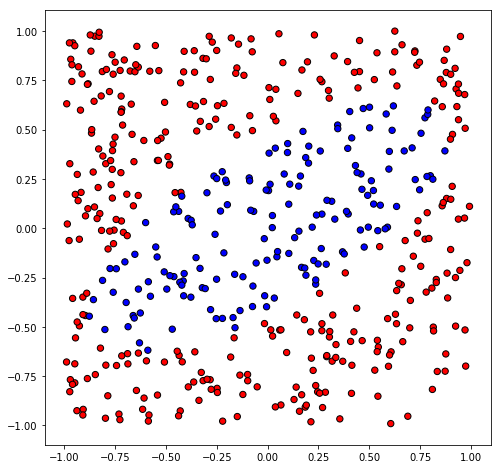

In [35]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

In [0]:
# agrega un punto con x = 2 para que aparezca la recta que pasa por el origen
#X = np.vstack([X,[2,-1,]])
#y = np.hstack([y,1])

In [0]:
model = LogisticRegression(solver='lbfgs', C=1)

In [43]:
model.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

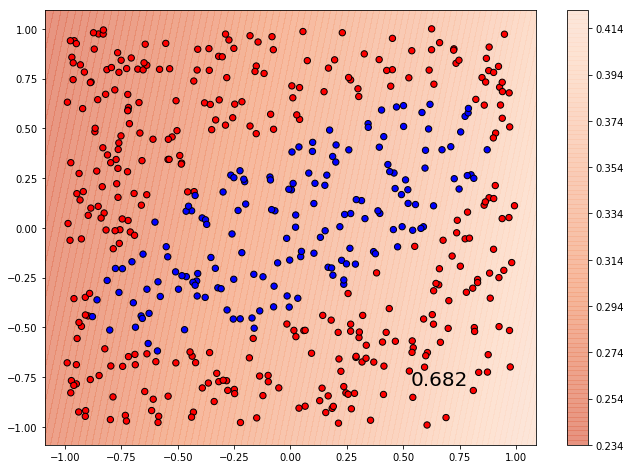

In [44]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

## Test Predict Proba

In [45]:
model.predict_proba([[0.5,0.75]])

array([[0.65150656, 0.34849344]])

## Test donde está la recta

-12.28977925697609
5.49035121886291


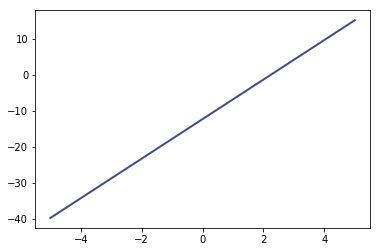

In [49]:
x1 = np.linspace(-5,5,100)
x2 = -(model.coef_[0][0]* x1+model.intercept_[0])/model.coef_[0][1]
print(-(model.intercept_[0])/model.coef_[0][1])
print(-(model.coef_[0][0])/model.coef_[0][1])
plt.plot(x1,x2,color='#414e8a',linewidth=2)

## LogLoss

In [45]:
#print(y)
#print(model.predict_proba(X)[:,0])
log_loss(y, model.predict_proba(X)[:,0])

0.9189176873144442

# Regresión polinomial

In [46]:
print('La dimensión de las observaciones',X.shape, 'Tiene que quedar en (500, 6)')

La dimensión de las observaciones (500, 2) Tiene que quedar en (500, 6)


In [0]:
# Regresión polinomial, por agregar features polinómicos. Se puede agregar logaritmicos, etc.
# Completar la función 
def add_columns(X):
    # Se agrega primer columna elevada al cuadrada como 3er columna
    X = np.append(X, (X[:,0]**2).reshape(-1,1), axis=1)
    # TODO: Agregar producto de primer columna por segunda columna en la cuarta columna
    X = np.append(X, (X[:,0]*X[:,1]).reshape(-1,1), axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # TODO: Agregar segunda columna elevada al cuadrada como 5er columna
    X = np.append(X, (X[:,1]**2).reshape(-1,1), axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # Se agrega la columna de 1s como 6ta columna para despues usar fit_intercept=False. Es necesario para la librería de graficación
    X = np.append(np.ones((len(X), 1)), X, axis=1)
    return X

In [48]:
add_columns(X).shape

(500, 6)

In [0]:
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False)

In [62]:
model_poly.fit(add_columns(X), y)
print(y)
print(model_poly)

[0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 1 1 0 1 0 0 0 0 1 0 0 1 

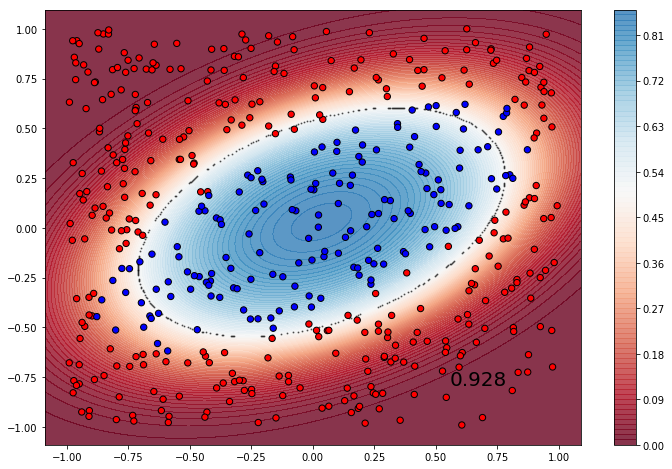

In [63]:
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

# Regularización

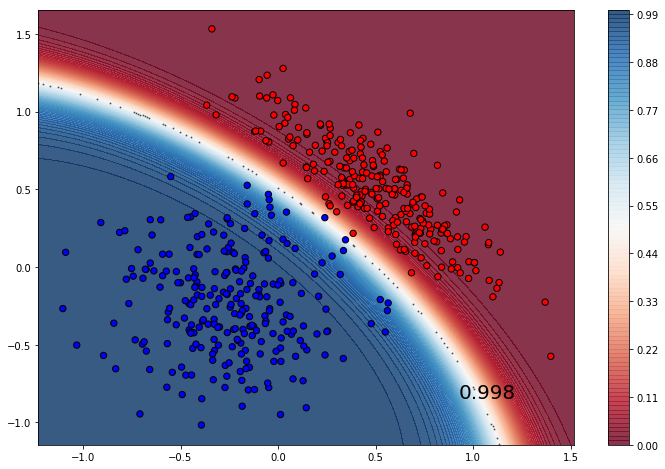

In [70]:
C = 10 # Modifique el valos de C
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False, C=C)
model_poly.fit(add_columns(X), y)
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)